In [14]:
from qiskit import QuantumCircuit

In [15]:
msg = '01'
a = eval(msg[0])
b = eval(msg[1])

### 准备一个 $ \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle $ 的纠缠量子对


In [16]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

### 如果a==1, Alice对第一个qubit进行Z变换，如果a==0, 不操作。

$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$


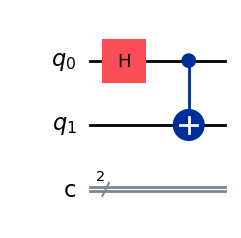

In [17]:
if a==1:
    qc.z(0)
qc.draw(output='mpl')

### 如果b==1, Alice对第一个qubit进行X变换，如果b==0, 不操作。

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$


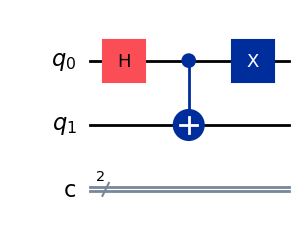

In [18]:
if b==1:
    qc.x(0)
qc.draw(output='mpl')

### Alice将第一个qubit发送给Bob, Bob对两个qubit进行CNOT操作

$$CNOT = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

### Bob再对第一个qubit进行H变换

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$


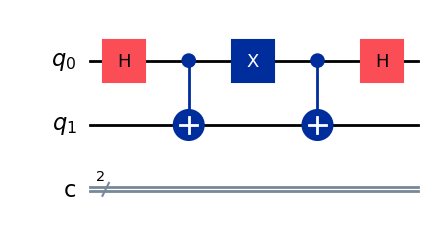

In [19]:
qc.cx(0, 1)
qc.h(0)
qc.draw(output='mpl')

### Bob测量两个qubits

In [20]:
qc.measure([0, 1], [0, 1])

### 执行这个电路

In [21]:
from funcs import *

results = execute_qc(qc)
print(results)

{'10': 967, '00': 39, '11': 16, '01': 2}


### 从结果中还原信息

In [22]:
rcv_msg = max(results, key=lambda key: results[key])
print("The received message is: ", rcv_msg)

The received message is:  10
